# Webscraping example

This project is designed to grab all the data from a wikipedia page and capture the links and a table within the page.  The example I am using is Waterloo, ON's Wikipedia page.  The example is all the links and the population which I want to chart.

In [97]:
%matplotlib inline
from bs4 import BeautifulSoup
import pandas as pd
import requests
import seaborn as sns

In [98]:
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [15]:
r  = requests.get("https://en.wikipedia.org/wiki/Waterloo,_Ontario")

data = r.text
soup = BeautifulSoup(data)

# Getting all of the links in a wikipedia webpage

Note that in HTML the way to call a link is _<a href="..._

So BeautifulSoup helps parse just those tags

In [19]:
# Get all of the links 
# Note that
for link in soup.find_all('a'):
    print(link.get('href'))

None
#mw-head
#p-search
/wiki/List_of_cities_in_Ontario
/wiki/List_of_municipalities_in_Ontario#Lower-tier_municipalities
/wiki/File:Uptown_Waterloo_Ontario.JPG
/wiki/File:Waterloo,_Ontario_(typing).svg
/wiki/List_of_city_nicknames_in_Canada#Ontario
#cite_note-@UW-1
/wiki/File:Waterloo,_Ontario.png
/wiki/File:Canada_Southern_Ontario_location_map_2.png
//tools.wmflabs.org/geohack/geohack.php?pagename=Waterloo,_Ontario&params=43_28_N_80_31_W_region:CA-ON_type:city
/wiki/Geographic_coordinate_system
//tools.wmflabs.org/geohack/geohack.php?pagename=Waterloo,_Ontario&params=43_28_N_80_31_W_region:CA-ON_type:city
/wiki/Canada
/wiki/Provinces_and_territories_of_Canada
/wiki/Ontario
/wiki/Census_divisions_of_Ontario
/wiki/Regional_Municipality_of_Waterloo
/w/index.php?title=Dave_Jaworsky&action=edit&redlink=1
/wiki/Waterloo_City_Council
/wiki/City_manager
/wiki/House_of_Commons_of_Canada
/wiki/Bardish_Chagger
/wiki/Liberal_Party_of_Canada
/wiki/Legislative_Assembly_of_Ontario
/wiki/Catherine_F

# Getting population data and plotting it

In [24]:
x=soup.find_all('p')[2]

In [145]:
data = []
table = soup.find('table', attrs={'cellpadding':'1'})
table_body = table.find('tbody')

rows = table_body.find_all('tr')
header=True
for row in rows:
    
    if header:
        cols = row.find_all('th')
        header_names = [ele.text[:-1] for ele in cols]
        header=False
    else:    
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        cols = [int(ele.replace(',','')) for ele in cols]
        data.append([ele for ele in cols if ele]) # Get rid of empty values
population=pd.DataFrame(data,columns=header_names).set_index(['Census'])

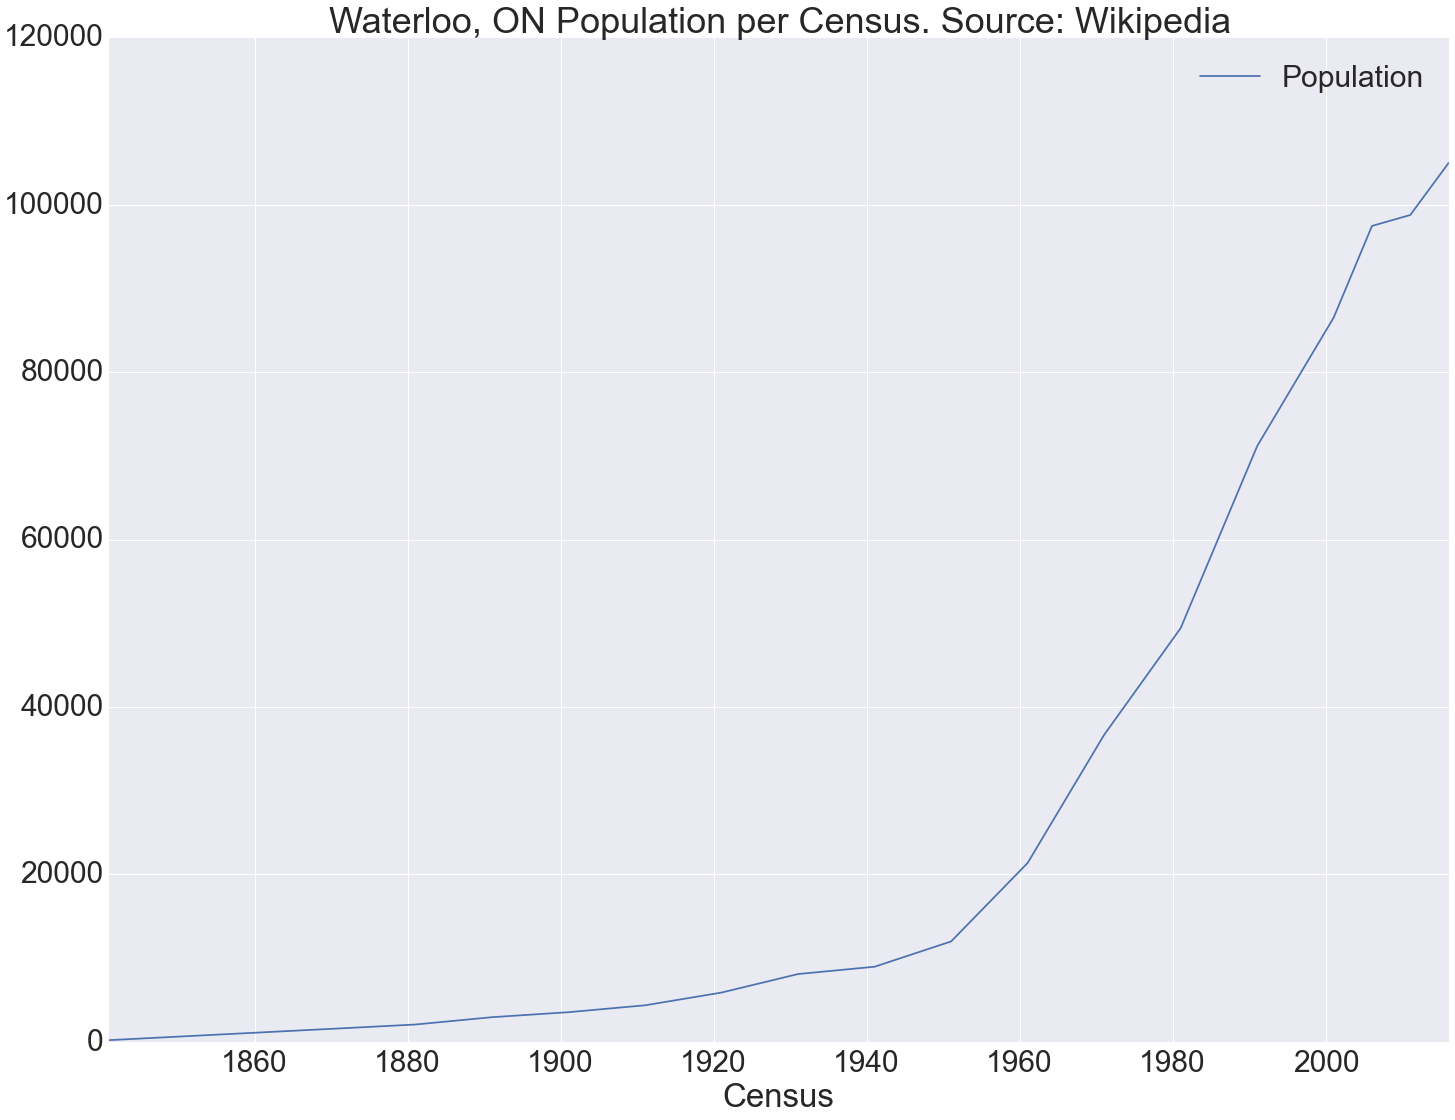

In [147]:
population.plot(title='Waterloo, ON Population per Census. Source: Wikipedia')

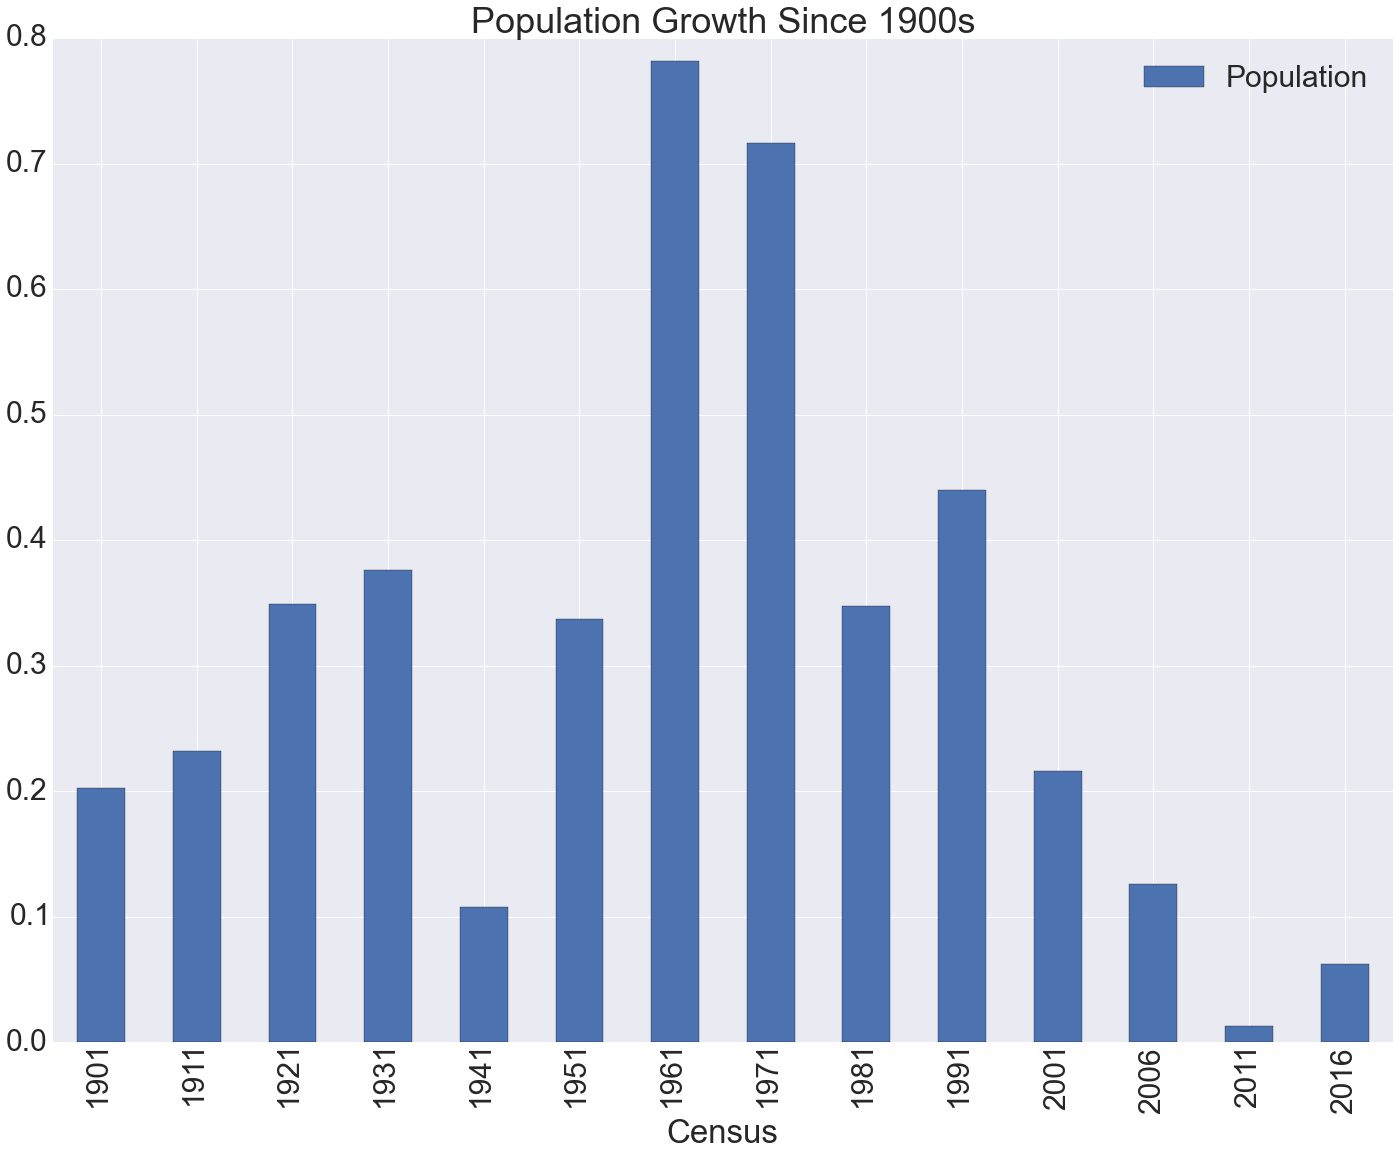

In [154]:
population.pct_change()[4:].plot(kind='bar',title='Population Growth Since 1900s')